# 07. Synthetic network analysis
## Project: Bicycle node network loop analysis

This notebook analyses synthetic networks (lattices).

Contact: Michael Szell (michael.szell@gmail.com)

Created: 2024-10-28  
Last modified: 2025-08-29

## Parameters

In [1]:
%run -i setup_parameters.py
load_data = True  # Set to False if data are huge and have already been loaded
debug = True  # Set to True for extra plots and verbosity

gsize_set = 4  # number of nodes in each dimension. Networks will have ~size^2 nodes.
linklength = 1000  # m

## Functions

In [2]:
%run -i functions.py

## Load data

In [3]:
if load_data:
    if LOOP_LENGTH_BOUND:
        llb_string = "_maxlength" + str(LOOP_LENGTH_BOUND)
    else:
        llb_string = ""

    with open(
        PATH["data_out"]
        + "loopcensus_"
        + str(LOOP_NUMNODE_BOUND)
        + llb_string
        + ".pkl",
        "rb",
    ) as f:
        allloops = pickle.load(f)
        alllooplengths = pickle.load(f)
        allloopnumnodes = pickle.load(f)
        allloopmaxslopes = pickle.load(f)
        Gnx_DK = pickle.load(f)
        LOOP_NUMNODE_BOUND = pickle.load(f)
        nodes_id = pickle.load(f)
        nodes_coords = pickle.load(f)
        #numloops = pickle.load(f)
        faceloops = pickle.load(f)

## Analytical comparison link lengths vs faceloops

In [4]:
print("Target link length: " + str(LINK_LIMIT[0]) + " to " + str(LINK_LIMIT[1]))
print("")
print(
    "Target face loop length: "
    + str(FACELOOP_LIMIT[0])
    + " to "
    + str(FACELOOP_LIMIT[1])
)
for n in [3, 4, 6]:  # Regular grids
    print(
        " "
        + str(n)
        + "-gon face loop length: "
        + str(n * LINK_LIMIT[0])
        + " to "
        + str(n * LINK_LIMIT[1])
    )

for n in [3, 4]:  # Staggered grids
    print(
        "S"
        + str(n)
        + "-gon face loop length: "
        + str(2 * n * LINK_LIMIT[0])
        + " to "
        + str(n * LINK_LIMIT[1])
    )

Target link length: 1000 to 5000

Target face loop length: 8000 to 20000
 3-gon face loop length: 3000 to 15000
 4-gon face loop length: 4000 to 20000
 6-gon face loop length: 6000 to 30000
S3-gon face loop length: 6000 to 15000
S4-gon face loop length: 8000 to 20000


In [5]:
degree_hist = nx.degree_histogram(Gnx_DK)
print(list(range(len(degree_hist))))
print(degree_hist)
print([d / sum(degree_hist) for d in degree_hist])
print(str(round(100 * degree_hist[3] / sum(degree_hist))) + "% of nodes have degree 3.")

[0, 1, 2, 3, 4]
[0, 0, 0, 58, 1]
[0.0, 0.0, 0.0, 0.9830508474576272, 0.01694915254237288]
98% of nodes have degree 3.


## Create synthetic networks

In [6]:
Gnx_synth = {
    "tri": {"constructor": nx.triangular_lattice_graph},
    "grid": {"constructor": nx.grid_2d_graph},
    # To do: Add staggered grid (all degree 3 nodes)
    # Inspiration: https://github.com/networkx/networkx/blob/478183cb7c692a82dd529c58f20d05a17b271242/networkx/generators/lattice.py#L37
    "hex": {"constructor": nx.hexagonal_lattice_graph},
}

In [7]:
for gsize in range(2, 11):
    for gtype in Gnx_synth:
        Gnx_synth[gtype][gsize] = {}
        Gnx_synth[gtype][gsize]["Gnx"] = Gnx_synth[gtype]["constructor"](gsize, gsize)
        if gtype == "grid":
            pos = dict(
                zip(Gnx_synth[gtype][gsize]["Gnx"], Gnx_synth[gtype][gsize]["Gnx"])
            )  # Source: https://stackoverflow.com/a/37106552
            nx.set_node_attributes(Gnx_synth[gtype][gsize]["Gnx"], pos, "pos")
        nx.set_edge_attributes(
            Gnx_synth[gtype][gsize]["Gnx"], linklength, name="weight"
        )

        # Scale by linklength
        nx.set_node_attributes(
            Gnx_synth[gtype][gsize]["Gnx"],
            {
                k: (linklength * v[0], linklength * v[1])
                for (k, v) in nx.get_node_attributes(
                    Gnx_synth[gtype][gsize]["Gnx"], "pos"
                ).items()
            },
            "pos",
        )

        # momepy format
        (
            Gnx_synth[gtype][gsize]["nodes"],
            Gnx_synth[gtype][gsize]["links"],
        ) = synthnx_to_momepy(Gnx_synth[gtype][gsize]["Gnx"])

/Users/jqz304/Documents/bikenwloops/code/functions.py:642: UserWarning: Geometry column does not contain geometry.
  Gnx_links["geometry"] = ""
/Users/jqz304/Documents/bikenwloops/code/functions.py:642: UserWarning: Geometry column does not contain geometry.
  Gnx_links["geometry"] = ""
/Users/jqz304/Documents/bikenwloops/code/functions.py:642: UserWarning: Geometry column does not contain geometry.
  Gnx_links["geometry"] = ""
/Users/jqz304/Documents/bikenwloops/code/functions.py:642: UserWarning: Geometry column does not contain geometry.
  Gnx_links["geometry"] = ""
/Users/jqz304/Documents/bikenwloops/code/functions.py:642: UserWarning: Geometry column does not contain geometry.
  Gnx_links["geometry"] = ""
/Users/jqz304/Documents/bikenwloops/code/functions.py:642: UserWarning: Geometry column does not contain geometry.
  Gnx_links["geometry"] = ""
/Users/jqz304/Documents/bikenwloops/code/functions.py:642: UserWarning: Geometry column does not contain geometry.
  Gnx_links["geometry

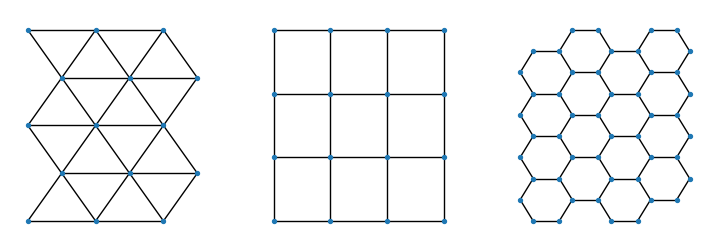

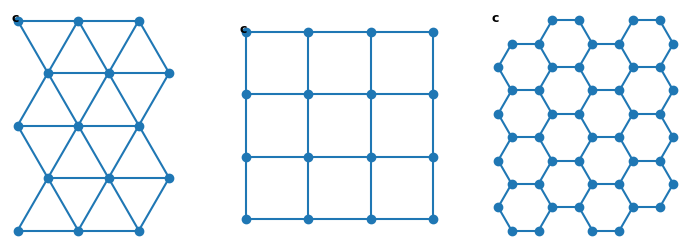

In [8]:
gsize = gsize_set
if debug:
    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    for i, gtype in enumerate(Gnx_synth):
        nx.draw(
            Gnx_synth[gtype][gsize]["Gnx"],
            pos=nx.get_node_attributes(Gnx_synth[gtype][gsize]["Gnx"], "pos"),
            ax=axs[i],
            node_size=8,
        )

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for i, gtype in enumerate(Gnx_synth):
    Gnx_synth[gtype][gsize]["nodes"].plot(ax=axs[i])
    Gnx_synth[gtype][gsize]["links"].plot(ax=axs[i])
    axs[i].set_axis_off()
    axs[i].text(0.01, 0.95, "c", transform=axs[i].transAxes, weight="bold", size=9)

## Get all loops, for one case

In [9]:
gtype = "grid"

In [10]:
gsize = gsize_set
Gnx = Gnx_synth[gtype][gsize]["Gnx"]
Gnx_nodes = Gnx_synth[gtype][gsize]["nodes"]
Gnx_links = Gnx_synth[gtype][gsize]["links"]

In [11]:
# Get all loops, meaning a loop ABCA is counted also as ABCA, BCAB, and CABC
allloops = {}
nodes_done = set()
numloops = 0
allloops_generator = nx.simple_cycles(
    Gnx_synth[gtype][gsize]["Gnx"], length_bound=LOOP_NUMNODE_BOUND
)  # length refers to number of nodes
for c in tqdm(allloops_generator, desc="Generate all loops"):
    sourcenode = c[0]
    c_length = get_loop_length(c)
    # LOOP_LENGTH_BOUND is 0 for no limit, or a number (meters)
    if not LOOP_LENGTH_BOUND or c_length * MPERUNIT <= LOOP_LENGTH_BOUND:
        for sourcenode in c:
            numloops += 1
            if sourcenode in nodes_done:
                allloops[sourcenode]["loops"].append(c)
                allloops[sourcenode]["lengths"].append(c_length)
                allloops[sourcenode]["numnodes"].append(len(c))
            else:
                allloops[sourcenode] = {
                    "loops": [c],
                    "lengths": [c_length],
                    "numnodes": [len(c)],
                }
                nodes_done.add(sourcenode)
if LOOP_LENGTH_BOUND:
    llb_string = " and length bound " + str(LOOP_LENGTH_BOUND) + "m"
else:
    llb_string = ""
print(
    "Found "
    + str(numloops)
    + " loops for number of nodes bound "
    + str(LOOP_NUMNODE_BOUND)
    + llb_string
)
Gnx_synth[gtype][gsize]["alloops"] = allloops
Gnx_synth[gtype][gsize]["numloops"] = numloops


allloops_bound = {}
numloops_bound = 0
for sourcenode in tqdm(allloops, desc="Restrict to scenario lengths"):
    try:
        lengths_this = np.array(allloops[sourcenode]["lengths"] * MPERUNIT)
        mask_this = (lengths_this >= SCENARIO[SCENARIOID]["looplength_min"]) & (
            lengths_this <= SCENARIO[SCENARIOID]["looplength_max"]
        )
        allloops_bound[sourcenode] = mask_node(
            allloops[sourcenode], mask_this, ["loops", "lengths", "numnodes"]
        )
        numloops_bound += np.count_nonzero(mask_this)
    except:  # Account for 0 loop nodes
        allloops_bound[sourcenode] = {}
Gnx_synth[gtype][gsize]["allloops_bound"] = allloops_bound
Gnx_synth[gtype][gsize]["numloops_bound"] = numloops_bound
print("Found " + str(numloops_bound) + " loops for scenario")

Generate all loops: 0it [00:00, ?it/s]

Found 2292 loops for number of nodes bound 30 and length bound 40000m


Restrict to scenario lengths:   0%|          | 0/16 [00:00<?, ?it/s]

Found 1976 loops for scenario


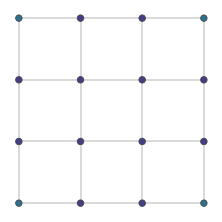

In [12]:
# Plot all bounded loops
vertex_size, vertex_color = get_vertex_plotinfo(
    Gnx_synth[gtype][gsize]["allloops_bound"]
)

fig = plt.figure(
    figsize=(0.3 * 640 / PLOTPARAM["dpi"], 0.3 * 640 / PLOTPARAM["dpi"]),
    dpi=PLOTPARAM["dpi"],
)
ax = fig.add_axes(
    [-0.03, -0.03, 1.06, 1.06]
)  # negative because plot() introduces a padding
if Gnx_synth[gtype][gsize]["nodes"] is not None:
    Gnx_synth[gtype][gsize]["nodes"].plot(
        ax=ax,
        zorder=1,
        markersize=vertex_size,
        alpha=1,
        color=vertex_color,
        edgecolor=PLOTPARAM["color"]["neutral"],
        linewidth=0.6,
    )
Gnx_synth[gtype][gsize]["links"].plot(
    ax=ax, zorder=0, linewidth=0.3, color=PLOTPARAM["color"]["neutral"]
)

ax.set_axis_off()

## Get all loop numbers, systematically

In [13]:
sysruns = {"gsizes": [3, 4, 5], "gtypes": ["tri", "grid"], "linklengths": [1000, 5000]}
sysresults = {}
sysruns_single = list(product(*sysruns.values()))
for gsize, gtype, linklength in sysruns_single:
    print(gsize, gtype, linklength)
    Gnx = Gnx_synth[gtype][gsize]["Gnx"]
    numloops = 0
    allloops_generator = nx.simple_cycles(
        Gnx, length_bound=LOOP_NUMNODE_BOUND
    )  # length refers to number of nodes
    for c in tqdm(allloops_generator, desc="Generate all loops"):
        sourcenode = c[0]
        c_length = get_loop_length(c)
        if (
            c_length * MPERUNIT >= SCENARIO[SCENARIOID]["looplength_min"]
            and c_length * MPERUNIT <= SCENARIO[SCENARIOID]["looplength_max"]
        ):
            for sourcenode in c:
                numloops += 1
    sysresults[gsize, gtype, linklength] = numloops

sysresults

3 tri 1000


Generate all loops: 0it [00:00, ?it/s]

3 tri 5000


Generate all loops: 0it [00:00, ?it/s]

3 grid 1000


Generate all loops: 0it [00:00, ?it/s]

3 grid 5000


Generate all loops: 0it [00:00, ?it/s]

4 tri 1000


Generate all loops: 0it [00:00, ?it/s]

4 tri 5000


Generate all loops: 0it [00:00, ?it/s]

4 grid 1000


Generate all loops: 0it [00:00, ?it/s]

4 grid 5000


Generate all loops: 0it [00:00, ?it/s]

5 tri 1000


Generate all loops: 0it [00:00, ?it/s]

5 tri 5000


Generate all loops: 0it [00:00, ?it/s]

5 grid 1000


Generate all loops: 0it [00:00, ?it/s]

5 grid 5000


Generate all loops: 0it [00:00, ?it/s]

{(3, 'tri', 1000): 50,
 (3, 'tri', 5000): 50,
 (3, 'grid', 1000): 0,
 (3, 'grid', 5000): 0,
 (4, 'tri', 1000): 22096,
 (4, 'tri', 5000): 22096,
 (4, 'grid', 1000): 1976,
 (4, 'grid', 5000): 1976,
 (5, 'tri', 1000): 2303923,
 (5, 'tri', 5000): 2303923,
 (5, 'grid', 1000): 162576,
 (5, 'grid', 5000): 162576}